# CLASS 8: Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/reg_data.csv')

In [3]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [4]:
#pip install statsmodels

In [5]:
#pip install seaborn

In [6]:
#pip install sklearn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [8]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.580216,-0.207958
Age,0.580216,1.000000,-0.321182
Weight,-0.207958,-0.321182,1.000000


In [9]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [10]:
df.dropna(inplace=True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [11]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


1. Is there any relationship between age and salary? (Salary depends on Age?)

Salary = b0 + b1*Age

* b0 -> y intercept (is the value of 'y' when b1 = 0, when h has no impact on 'Salary')
* b1 -> pendiente/slope/increment

In [12]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

In [13]:
lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [14]:
print('The y intercept, b0 = ', model_lm.intercept_)
print('The coeff. of Age, b1 = ', model_lm.coef_)
print('The R^2 value is = ', model_lm.score(x,y))

The y intercept, b0 =  [349.44580104]
The coeff. of Age, b1 =  [[48.09321584]]
The R^2 value is =  0.380484541757693


*It's not a good model because it can depend on some other factors.*

In [15]:
modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:27:10   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* salary = b0 + b1*age
* Salary of a person with age = 33?
* salary = 349.44580104 + 48.09321584 * 33

In [16]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [17]:
salary = 349.44580104 + 48.09321584 * 33
print('Predicted salary of a person with age 33 is',salary)

Predicted salary of a person with age 33 is 1936.52192376


In [18]:
res0 = 1500 - 1936.52192376
res1 = 1200 - 1936.52192376
print('residual values of first two data are:', res0, '\t',res1)

residual values of first two data are: -436.52192375999994 	 -736.5219237599999


In [19]:
RESI_A = resultA.resid
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

Text(0.5, 1.0, 'Regression plot of Age vs Salary')

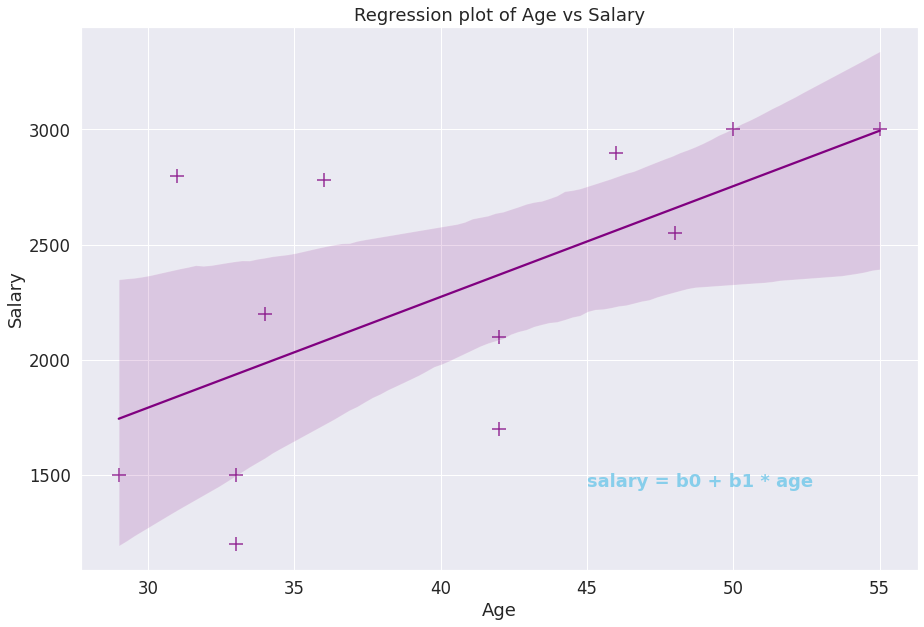

In [20]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                y = 'Salary',
                data = df, 
                color = 'purple',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel = 'Age',
      ylabel = 'Salary')

ax.text(45, 1450, 'salary = b0 + b1 * age',
       horizontalalignment = 'left', size = 'medium', color = 'skyblue',
       weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')

In [21]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


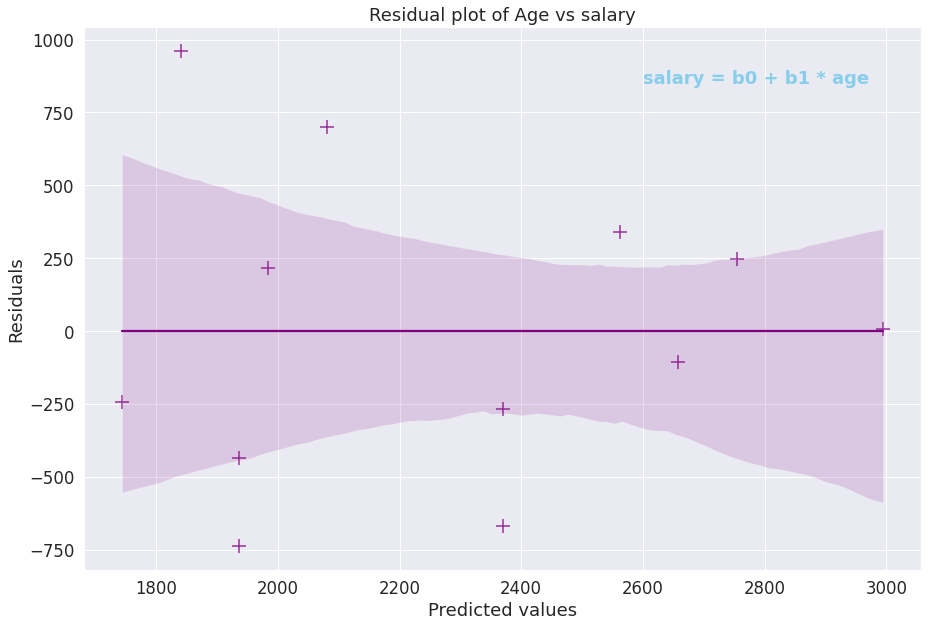

In [34]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = predicted_values,
                y = RESI_A,
                data = df, 
                color = 'purple',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel = 'Predicted values',
      ylabel = 'Residuals')

ax.text(2600, 850, 'salary = b0 + b1 * age',
       horizontalalignment = 'left', size = 'medium', color = 'skyblue',
       weight = 'semibold')

ax.set_title('Residual plot of Age vs salary')
plt.show()

In [36]:
modelA = sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:40:33   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* salary = b0 + b1 * Age + b2 * Gender
* salary = b0 + b1 * Age + b2 * (G_male + G_female)

salary = 749.8157 + 34.2211 * Age + 306.7169 * Gender[T.Male]
* hombres ganan 306.7169 más que mujeres.

What is the salary of a male with age 42?

In [40]:
print('The salary of a male with age 42 =', 749.8157 + 34.2211 * 42 + 306.7169 * 1 )
print('The salary of a female with age 42 =', 749.8157 + 34.2211 * 42 + 306.7169 * 0 )

The salary of a male with age 42 = 2493.8188
The salary of a female with age 42 = 2187.1019


In [41]:
modelA = sm.OLS.from_formula('Salary~Age+Gender+Academic_degree', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.267
Time:                        14:50:19   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""